## Summarizing / Inferring / Transforming / Expanding

In [39]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_KEY')

def get_completion(prompt, model="gpt-3.5-turbo", temperature=0):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

What is temperate parameter in get_completion
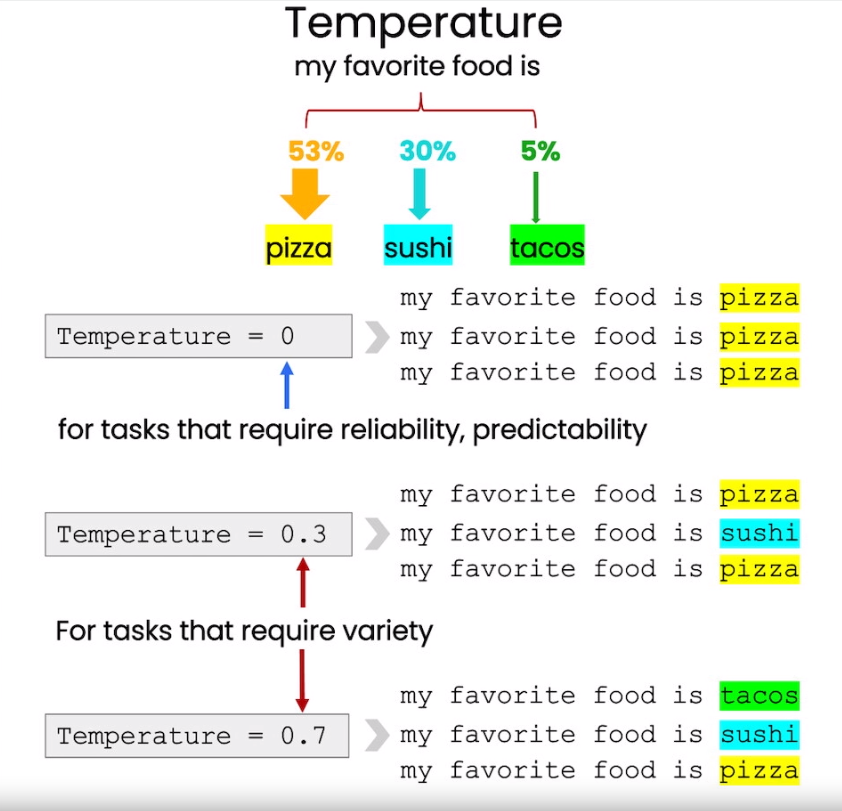

### Summarizing
We'll summarize text with a focus on specific topics.

#### Text to summarize

In [2]:
prod_review = """
Got this panda plush toy for my daughter's birthday, \
who loves it and takes it everywhere. It's soft and \ 
super cute, and its face has a friendly look. It's \ 
a bit small for what I paid though. I think there \ 
might be other options that are bigger for the \ 
same price. It arrived a day earlier than expected, \ 
so I got to play with it myself before I gave it \ 
to her.
"""

#### 1. Summarize with a word/sentence/character limit

In [3]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


This panda plush toy is loved by the reviewer's daughter, but they feel it is a bit small for the price.


#### 2. Summarize with a focus on shipping and delivery

In [4]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
Shipping deparmtment. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that mention shipping and delivery of the product. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The customer is happy with the product but suggests offering larger options for the same price. They also mention that the item arrived earlier than expected.


#### 3. Summarize with a focus on price and value

In [5]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
pricing deparmtment, responsible for determining the \
price of the product.  

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that are relevant to the price and perceived value. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The customer loves the panda plush toy for its softness and cuteness, but feels it is overpriced compared to other options available.


#### PS: Summaries include topics that are not related to the topic of focus.
#### Try "extract" instead of "summarize"

In [6]:
prompt = f"""
Your task is to extract relevant information from \ 
a product review from an ecommerce site to give \
feedback to the Shipping department. 

From the review below, delimited by triple quotes \
extract the information relevant to shipping and \ 
delivery. Limit to 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The relevant information for the Shipping department is that the product arrived a day earlier than expected.


#### Summarizing multiple product reviews

In [8]:
review_1 = prod_review 

# review for a standing lamp
review_2 = """
Needed a nice lamp for my bedroom, and this one \
had additional storage and not too high of a price \
point. Got it fast - arrived in 2 days. The string \
to the lamp broke during the transit and the company \
happily sent over a new one. Came within a few days \
as well. It was easy to put together. Then I had a \
missing part, so I contacted their support and they \
very quickly got me the missing piece! Seems to me \
to be a great company that cares about their customers \
and products. 
"""

# review for an electric toothbrush
review_3 = """
My dental hygienist recommended an electric toothbrush, \
which is why I got this. The battery life seems to be \
pretty impressive so far. After initial charging and \
leaving the charger plugged in for the first week to \
condition the battery, I've unplugged the charger and \
been using it for twice daily brushing for the last \
3 weeks all on the same charge. But the toothbrush head \
is too small. I’ve seen baby toothbrushes bigger than \
this one. I wish the head was bigger with different \
length bristles to get between teeth better because \
this one doesn’t.  Overall if you can get this one \
around the $50 mark, it's a good deal. The manufactuer's \
replacements heads are pretty expensive, but you can \
get generic ones that're more reasonably priced. This \
toothbrush makes me feel like I've been to the dentist \
every day. My teeth feel sparkly clean! 
"""

# review for a blender
review_4 = """
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

reviews = [review_1, review_2, review_3, review_4]

In [9]:
for i in range(len(reviews)):
    prompt = f"""
    Your task is to generate a short summary of a product \ 
    review from an ecommerce site. 

    Summarize the review below, delimited by triple \
    backticks in at most 20 words. 

    Review: ```{reviews[i]}```
    """

    response = get_completion(prompt)
    print(i, response, "\n")


0 Soft and cute panda plush toy loved by daughter, but small for the price. Arrived early. 

1 Great lamp with storage, fast delivery, excellent customer service, and easy assembly. Highly recommended. 

2 The reviewer recommends the electric toothbrush for its impressive battery life, but criticizes the small brush head. 

3 The reviewer found the price increase after the sale disappointing and noticed a decrease in quality. 



### Inferring

You will infer sentiment and topics from product reviews and news articles

#### Product review text

In [11]:
lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast.  The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together.  I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

#### 1. Sentiment (Positive/Negative)

In [12]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

The sentiment of the product review is positive.


In [13]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Give your answer as a single word, either "positive" \
or "negative".

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

positive


#### 2. Identify types of emotions

In [14]:
prompt = f"""
Identify a list of emotions that the writer of the \
following review is expressing. Include no more than \
five items in the list. Format your answer as a list of \
lower-case words separated by commas.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

satisfied, pleased, grateful, impressed, happy


#### 3. Identify anger

In [15]:
prompt = f"""
Is the writer of the following review expressing anger?\
The review is delimited with triple backticks. \
Give your answer as either yes or no.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

No


#### 4. Extract product and company name from customer reviews

In [16]:
prompt = f"""
Identify the following items from the review text: 
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Item" and "Brand" as the keys. 
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
  
Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

{
  "Item": "lamp",
  "Brand": "Lumina"
}


#### 5. Doing multiple tasks at once

In [17]:
prompt = f"""
Identify the following items from the review text: 
- Sentiment (positive or negative)
- Is the reviewer expressing anger? (true or false)
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
Format the Anger value as a boolean.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

{
  "Sentiment": "positive",
  "Anger": false,
  "Item": "lamp",
  "Brand": "Lumina"
}


### Inferring topics

One of the cool application of LLM is Inferring topics, given the long piece of text, you can ask what is this text about? what are the topics ? 

In [19]:
## Ficticious news article

story = """
In a recent survey conducted by the government, 
public sector employees were asked to rate their level 
of satisfaction with the department they work at. 
The results revealed that NASA was the most popular 
department with a satisfaction rating of 95%.

One NASA employee, John Smith, commented on the findings, 
stating, "I'm not surprised that NASA came out on top. 
It's a great place to work with amazing people and 
incredible opportunities. I'm proud to be a part of 
such an innovative organization."

The results were also welcomed by NASA's management team, 
with Director Tom Johnson stating, "We are thrilled to 
hear that our employees are satisfied with their work at NASA. 
We have a talented and dedicated team who work tirelessly 
to achieve our goals, and it's fantastic to see that their 
hard work is paying off."

The survey also revealed that the 
Social Security Administration had the lowest satisfaction 
rating, with only 45% of employees indicating they were 
satisfied with their job. The government has pledged to 
address the concerns raised by employees in the survey and 
work towards improving job satisfaction across all departments.
"""

#### 1. Infer 5 topics that are discussed in this following text

In [21]:
prompt = f"""
Determine five topics that are being discussed in the \
following text, which is delimited by triple backticks.

Make each item one or two words long. 

Format your response as a list of items separated by commas.

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)

1. Government survey
2. Department satisfaction rating
3. NASA
4. Social Security Administration
5. Job satisfaction improvement


In [22]:
## Based on the topic list given below, determine which of the items is part of the topics of text

topic_list = [
    "nasa", "local government", "engineering", 
    "employee satisfaction", "federal government"
]

prompt = f"""
Determine whether each item in the following list of \
topics is a topic in the text below, which
is delimited with triple backticks.

Give your answer as list with 0 or 1 for each topic.\

List of topics: {", ".join(topic_list)}

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)

[1, 0, 0, 1, 1]


### Transforming

We'll explore how to use LLM (Large Language Models) for text transformation tasks such as language translation, spelling and grammar checking, tone adjustment, and format conversion.

#### 1. Translation
ChatGPT is trained with sources in many languages. This gives the model the ability to do translation.

In [23]:
prompt = f"""
Translate the following English text to Spanish: \ 
```Hi, I would like to order a blender```
"""
response = get_completion(prompt)
print(response)

Hola, me gustaría ordenar una licuadora.


In [24]:
prompt = f"""
Tell me which language this is: 
```Combien coûte le lampadaire?```
"""
response = get_completion(prompt)
print(response)

This language is French.


In [25]:
prompt = f"""
Translate the following  text to French and Spanish
and English pirate: \
```I want to order a basketball```
"""
response = get_completion(prompt)
print(response)

French: ```Je veux commander un ballon de basket```
Spanish: ```Quiero ordenar una pelota de baloncesto```
English: ```I want to order a basketball```


In [26]:
prompt = f"""
Translate the following text to Spanish in both the \
formal and informal forms: 
'Would you like to order a pillow?'
"""
response = get_completion(prompt)
print(response)

Formal: ¿Le gustaría ordenar una almohada?
Informal: ¿Te gustaría ordenar una almohada?


#### 2. Universal Translator
Imagine you are in charge of IT at a large multinational e-commerce company. Users are messaging you with IT issues in all their native languages. Your staff is from all over the world and speaks only their native languages. You need a universal translator!

In [27]:
user_messages = [
  "La performance du système est plus lente que d'habitude.",  # System performance is slower than normal         
  "Mi monitor tiene píxeles que no se iluminan.",              # My monitor has pixels that are not lighting
  "Il mio mouse non funziona",                                 # My mouse is not working
  "Mój klawisz Ctrl jest zepsuty",                             # My keyboard has a broken control key
  "我的屏幕在闪烁"                                               # My screen is flashing
] 

In [28]:
for issue in user_messages:
    prompt = f"Tell me what language this is: ```{issue}```"
    lang = get_completion(prompt)
    print(f"Original message ({lang}): {issue}")

    prompt = f"""
    Translate the following  text to English \
    and Korean: ```{issue}```
    """
    response = get_completion(prompt)
    print(response, "\n")

Original message (The language is French.): La performance du système est plus lente que d'habitude.
The performance of the system is slower than usual.

시스템의 성능이 평소보다 느립니다. 

Original message (The language is Spanish.): Mi monitor tiene píxeles que no se iluminan.
English: "My monitor has pixels that do not light up."

Korean: "내 모니터에는 밝아지지 않는 픽셀이 있습니다." (Nae moniteoeneun balkaji-ji anhneun piksel-i issseumnida.) 

Original message (The language is Italian.): Il mio mouse non funziona
English: "My mouse is not working."
Korean: "내 마우스가 작동하지 않습니다." 

Original message (The language is Polish.): Mój klawisz Ctrl jest zepsuty
English: "My Ctrl key is broken"
Korean: "내 Ctrl 키가 고장 났어요" 

Original message (The language is Chinese.): 我的屏幕在闪烁
English: My screen is flickering.
Korean: 내 화면이 깜박거립니다. 



#### 3. Tone Transformation
Writing can vary based on the intended audience. ChatGPT can produce different tones.

In [29]:
prompt = f"""
Translate the following from slang to a business letter: 
'Dude, This is Joe, check out this spec on this standing lamp.'
"""
response = get_completion(prompt)
print(response)

Dear Sir/Madam,

I hope this letter finds you well. My name is Joe, and I am writing to bring your attention to a specification document regarding a standing lamp. 

I kindly request that you take a moment to review the attached document, as it provides detailed information about the features and specifications of the aforementioned standing lamp. 

Thank you for your time and consideration. I look forward to discussing this further with you.

Yours sincerely,
Joe


#### 4. Format Conversion
ChatGPT can translate between formats. The prompt should describe the input and output formats.

In [30]:
data_json = { "resturant employees" :[ 
    {"name":"Shyam", "email":"shyamjaiswal@gmail.com"},
    {"name":"Bob", "email":"bob32@gmail.com"},
    {"name":"Jai", "email":"jai87@gmail.com"}
]}

prompt = f"""
Translate the following python dictionary from JSON to an HTML \
table with column headers and title: {data_json}
"""
response = get_completion(prompt)
print(response)

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h2>Restaurant Employees</h2>

<table>
  <tr>
    <th>Name</th>
    <th>Email</th>
  </tr>
  <tr>
    <td>Shyam</td>
    <td>shyamjaiswal@gmail.com</td>
  </tr>
  <tr>
    <td>Bob</td>
    <td>bob32@gmail.com</td>
  </tr>
  <tr>
    <td>Jai</td>
    <td>jai87@gmail.com</td>
  </tr>
</table>

</body>
</html>


In [31]:
from IPython.display import display, Markdown, Latex, HTML, JSON
display(HTML(response))

Name,Email
Shyam,shyamjaiswal@gmail.com
Bob,bob32@gmail.com
Jai,jai87@gmail.com


#### 5. Spellcheck/Grammar check
Here are some examples of common grammar and spelling problems and LLM's response.
To signal to the LLM that you want to proofread your text, you instruct the model to "proffread" or "proofread and correct"

In [32]:
text = [ 
  "The girl with the black and white puppies have a ball.",  # The girl has a ball.
  "Yolanda has her notebook.", # ok
  "Its going to be a long day. Does the car need it’s oil changed?",  # Homonyms
  "Their goes my freedom. There going to bring they’re suitcases.",  # Homonyms
  "Your going to need you’re notebook.",  # Homonyms
  "That medicine effects my ability to sleep. Have you heard of the butterfly affect?", # Homonyms
  "This phrase is to cherck chatGPT for speling abilitty"  # spelling
]
for t in text:
    prompt = f"""Proofread and correct the following text
    and rewrite the corrected version. If you don't find
    and errors, just say "No errors found". Don't use 
    any punctuation around the text:
    ```{t}```"""
    response = get_completion(prompt)
    print(response)

The girl with the black and white puppies has a ball.
No errors found.
It's going to be a long day. Does the car need its oil changed?
There goes my freedom. They're going to bring their suitcases.
You're going to need your notebook.
That medicine affects my ability to sleep. Have you heard of the butterfly effect?
This phrase is to check chatGPT for spelling ability.


In [33]:
text = f"""
Got this for my daughter for her birthday cuz she keeps taking \
mine from my room.  Yes, adults also like pandas too.  She takes \
it everywhere with her, and it's super soft and cute.  One of the \
ears is a bit lower than the other, and I don't think that was \
designed to be asymmetrical. It's a bit small for what I paid for it \
though. I think there might be other options that are bigger for \
the same price.  It arrived a day earlier than expected, so I got \
to play with it myself before I gave it to my daughter.
"""
prompt = f"proofread and correct this review: ```{text}```"
response = get_completion(prompt)
print(response)

Got this for my daughter for her birthday because she keeps taking mine from my room. Yes, adults also like pandas too. She takes it everywhere with her, and it's super soft and cute. However, one of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. Additionally, it's a bit small for what I paid for it. I believe there might be other options that are bigger for the same price. On the positive side, it arrived a day earlier than expected, so I got to play with it myself before I gave it to my daughter.


In [35]:
from redlines import Redlines

diff = Redlines(text,response)
display(Markdown(diff.output_markdown))

Got this for my daughter for her birthday <span style='color:red;font-weight:700;text-decoration:line-through;'>cuz </span><span style='color:green;font-weight:700;'>because </span>she keeps taking mine from my <span style='color:red;font-weight:700;text-decoration:line-through;'>room.  </span><span style='color:green;font-weight:700;'>room. </span>Yes, adults also like pandas <span style='color:red;font-weight:700;text-decoration:line-through;'>too.  </span><span style='color:green;font-weight:700;'>too. </span>She takes it everywhere with her, and it's super soft and <span style='color:red;font-weight:700;text-decoration:line-through;'>cute.  One </span><span style='color:green;font-weight:700;'>cute. However, one </span>of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. <span style='color:red;font-weight:700;text-decoration:line-through;'>It's </span><span style='color:green;font-weight:700;'>Additionally, it's </span>a bit small for what I paid for <span style='color:red;font-weight:700;text-decoration:line-through;'>it though. </span><span style='color:green;font-weight:700;'>it. </span>I <span style='color:red;font-weight:700;text-decoration:line-through;'>think </span><span style='color:green;font-weight:700;'>believe </span>there might be other options that are bigger for the same <span style='color:red;font-weight:700;text-decoration:line-through;'>price.  It </span><span style='color:green;font-weight:700;'>price. On the positive side, it </span>arrived a day earlier than expected, so I got to play with it myself before I gave it to my daughter.

### Expanding
You will generate customer service emails that are tailored to each customer's review

#### 1. Customize the automated reply to a customer email

In [36]:
# given the sentiment from the lesson on "inferring",
# and the original customer message, customize the email
sentiment = "negative"

# review for a blender
review = f"""
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

In [37]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt)
print(response)

Dear Valued Customer,

Thank you for taking the time to share your review with us. We appreciate your feedback and apologize for any inconvenience you may have experienced.

We are sorry to hear about the price increase you noticed in December. We strive to provide competitive pricing for our products, and we understand your frustration. If you have any further concerns regarding pricing, we recommend reaching out to our customer service team who will be happy to assist you.

We also appreciate your feedback regarding the base of the system. We continuously work to improve the quality of our products, and your comments will be taken into consideration for future enhancements.

Regarding the motor issue you encountered, we apologize for any inconvenience caused. Our customer service team is available to assist you with any technical difficulties you may encounter, even if the warranty has expired. Please do not hesitate to reach out to them for further assistance.

Thank you once again 

#### 2. Remind the model to use details from the customer's email

In [40]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt, temperature=0.7)
print(response)

Dear valued customer,

Thank you for taking the time to share your review with us. We appreciate your feedback and apologize for any inconvenience you may have experienced.

We are sorry to hear about the issue you encountered with the pricing of our 17 piece system. We strive to provide fair and competitive prices to our customers, and we understand your frustration regarding the increase in prices. 

Regarding the quality of the base and the motor noise you mentioned, we apologize for any disappointment caused. We constantly strive to improve the quality of our products, and your feedback will be taken into consideration for future enhancements.

If you have any further concerns or questions, we encourage you to reach out to our customer service team. They will be more than happy to assist you and address any issues you may have.

Once again, we appreciate your feedback and thank you for choosing our products. We value your loyalty and will continue working hard to meet your expectat